# Analizar los resultados futuros

In [1]:
setwd(r"(C:\Users\AGPRES\INIA_Pucallpa\Contrato_3\Investigacion\03_Suelo_Teledeteccion\Satelite\PUCALLPA\Sentinel2\Bandas\Prediccion_ajuste)")

In [2]:
lista_tif <- list.files(pattern = "*Clasificacion")
lista_tif

[1] "Clasificacion_CE.tif" "Clasificacion_K.tif"  "Clasificacion_MO.tif"
[4] "Clasificacion_P.tif"  "Clasificacion_Ph.tif"

In [4]:
library(sp)
library(raster)
library(sf)
library(rgdal)

In [5]:
#install.packages("sf", lib=r"(C:\Program Files\R\R-4.2.2\library)")

In [6]:
Banda_CE <- raster(lista_tif[1])
Banda_K <- raster(lista_tif[2])
Banda_MO <- raster(lista_tif[3])
Banda_P <- raster(lista_tif[4])
Banda_PH <- raster(lista_tif[5])

In [7]:
Banda_Ponderada = (Banda_CE*Banda_K*Banda_MO*Banda_P*Banda_PH)^(1/5)

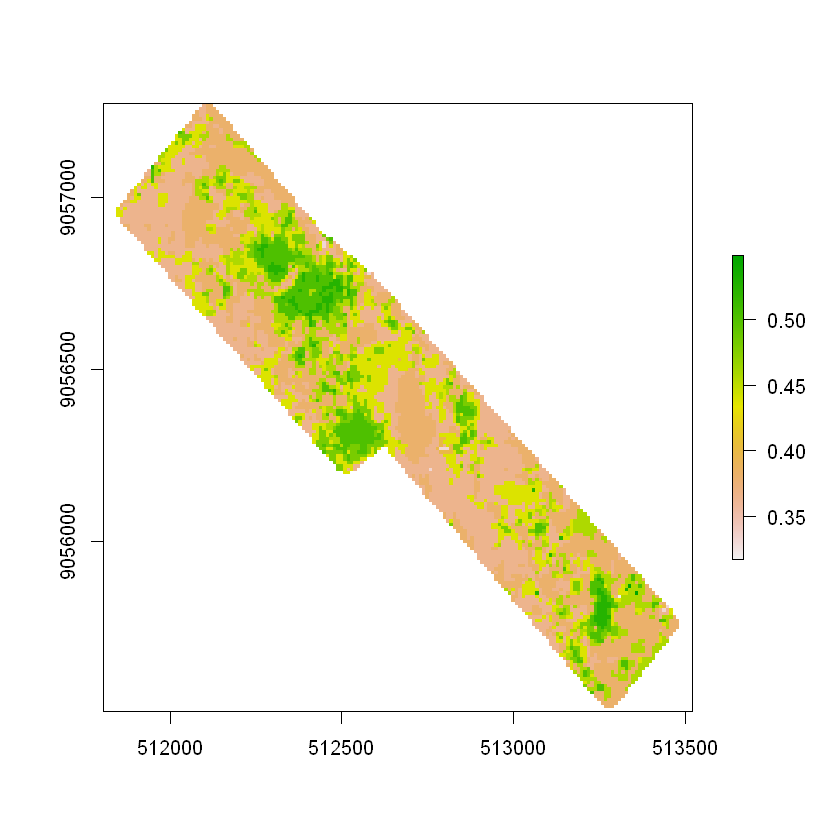

In [8]:
plot(Banda_Ponderada)

In [9]:
# Exportar raster
writeRaster(Banda_Ponderada, "Banda_Ponderada.tif",
            format="GTiff", overwrite=TRUE)

## Clasificación de calidad del suelo

|  Rangos   | Valor |Descripcion |
|:-------------------------:|:-----------:|:-----------:|
|       < 0.4 |         1     |  Inadecuado  |
|       0.4 - 0.6 |         2     |  Marginal  |
|       0.6 - 0.8 |         3     |  Moderado  |
| > 0.8   |          4     |  Alto  |

In [10]:
# Clasificacion en 4 clases
Clase_K <- c(-Inf,0.4, 1,
           0.4, 0.6, 2,
           0.6, 0.8, 3,
           0.8, Inf, 4)
mat_K <- matrix(Clase_K, ncol = 3, byrow = TRUE)
mat_K

-Inf,0.4,1
0.4,0.6,2
0.6,0.8,3
0.8,Inf,4


In [11]:
# Reclasificacion raster
Clasificacion_calidad_suelo <- reclassify(Banda_Ponderada, mat_K)

In [12]:
# Exportar raster
writeRaster(Clasificacion_calidad_suelo, "Clasificacion_calidad_suelo.tif",
            format="GTiff", overwrite=TRUE)

In [13]:
# Definimos la paleta de colores segun las 4 clases
mycolor <- c("#b6b2ab","#33b63e","#e0ee1a","#ee0004")

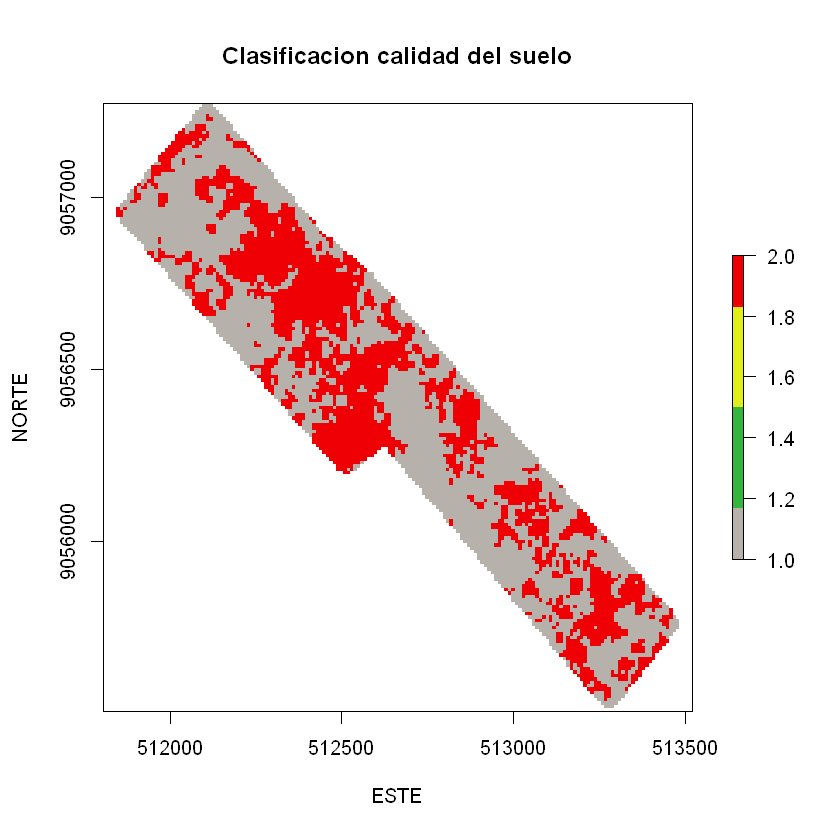

In [15]:
# Visualizar de la clasificacion
plot(Clasificacion_calidad_suelo, main = "Clasificacion calidad del suelo",
     axes = TRUE, xlab = "ESTE", ylab = "NORTE", col= mycolor)